In [2]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice
import matplotlib.pyplot as plt
import queue
import pandas as pd


from scipy.spatial.distance import cdist

In [3]:
class DBSCAN():
    def __init__(self):
        self.core = -1
        self.border = -2

    # Find all neighbour points at epsilon distance
    def neighbour_points(self, data, point, eps):
        points = []
        for i in range(len(data)):
            # Euclidian distance
            if np.linalg.norm([a_i - b_i for a_i, b_i in zip(data[i], data[point])]) <= eps:
                points.append(i)
        return points

    # Fit the data into the DBSCAN model
    def fit(self, data, Eps, minpts):
        # initialize all points as outliers
        point_label = [0] * len(data)
        point_count = []

        # initilize list for core/border points
        core = []
        border = []

        # Find the neighbours of each individual point
        for i in range(len(data)):
            point_count.append(self.neighbour_points(data, i, Eps))

        # Find all the core points, border points and outliers
        for i in range(len(point_count)):
            if (len(point_count[i]) >= minpts):
                point_label[i] = self.core
                core.append(i)
            else:
                border.append(i)

        for i in border:
            for j in point_count[i]:
                if j in core:
                    point_label[i] = self.border
                    break

        # Assign points to a cluster

        cluster = 1

        # Here we use a queue to find all the neighbourhood points of a core point and find the indirectly reachable points
        # We are essentially performing Breadth First search of all points which are within Epsilon distance for each other
        for i in range(len(point_label)):
            q = queue.Queue()
            if (point_label[i] == self.core):
                point_label[i] = cluster
                for x in point_count[i]:
                    if(point_label[x] == self.core):
                        q.put(x)
                        point_label[x] = cluster
                    elif(point_label[x] == self.border):
                        point_label[x] = cluster
                while not q.empty():
                    neighbors = point_count[q.get()]
                    for y in neighbors:
                        if (point_label[y] == self.core):
                            point_label[y] = cluster
                            q.put(y)
                        if (point_label[y] == self.border):
                            point_label[y] = cluster
                cluster += 1  # Move on to the next cluster

        return point_label, cluster

    # Visualize the clusters
    def visualize(self, data, cluster, numberOfClusters):
        N = len(data)

        colors = np.array(list(islice(cycle(['#FE4A49', '#2AB7CA']), 3)))

        for i in range(numberOfClusters):
            if (i == 0):
                # Plot all outliers point as black
                color = '#000000'
            else:
                color = colors[i % len(colors)]

            x, y = [], []
            for j in range(N):
                if cluster[j] == i:
                    x.append(data[j, 0])
                    y.append(data[j, 1])
            plt.scatter(x, y, c=color, alpha=1, marker='.')
        plt.show()


[1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 

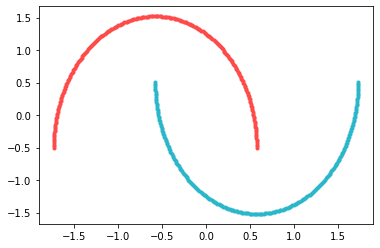

In [4]:
def main():

    # Reading from the data file
    df = pd.read_csv("Book1.csv")

    dataset = df.astype(float).values.tolist()

    # normalize dataset
    X = StandardScaler().fit_transform(dataset)

    _DBSCAN = DBSCAN()
    point_labels, clusters = _DBSCAN.fit(X, 0.125, 6)

    print(point_labels, clusters)
#     print(X)

    _DBSCAN.visualize(X, point_labels, clusters)
  


if __name__ == "__main__":
    main()

In [5]:
df = pd.read_csv("Book1.csv")
df


,Column1,Column2
0,1.489034,-0.372265
1,-0.993560,0.113308
2,1.375386,-0.426868
3,-0.856408,0.516299
4,0.446398,-0.332782
...,...,...
495,0.199975,-0.099966
496,-0.760611,0.649208
497,1.856408,-0.016299
498,-0.169505,0.985529


In [20]:
df = pd.read_csv("Book1.csv")

dataset = df.astype(float).values.tolist()

    # normalize dataset
X = StandardScaler().fit_transform(dataset)

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


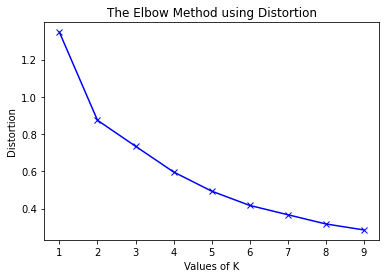

In [21]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

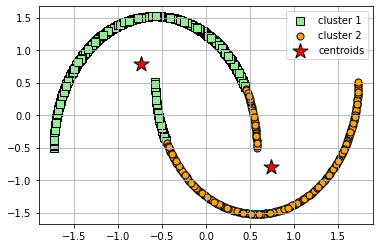

In [26]:
# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 0], X[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X[y_km == 1, 0], X[y_km == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)





# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

[1, 2, 2, 3, 3, 2, 2, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 1, 3, 3, 2, 3, 1, 1, 1, 2, 3, 3, 3, 1, 3, 3, 3, 3, 3, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 1, 1, 3, 3, 1, 2, 3, 2, 3, 1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 3, 2, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 2, 2, 2, 2, 1, 1, 3, 2, 1, 2, 3, 3, 1, 1, 3, 3, 3, 1, 1, 2, 3, 2, 3, 1, 3, 1, 2, 2, 1, 1, 2, 1, 2, 3, 3, 1, 3, 1, 3, 3, 2, 2, 3, 2, 1, 1, 2, 3, 3, 3, 1, 1, 1, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 2, 2, 1, 1, 3, 2, 3, 1, 2, 2, 1, 1, 3, 2, 3, 1, 2, 3, 3, 1, 1, 2, 3, 1, 2, 1, 3, 2, 3, 2, 1, 1, 3, 2, 2, 3, 1, 1, 1, 2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 2, 2, 3, 3, 1, 1, 1, 3, 1, 2, 2, 3, 2, 2, 1, 3, 2, 1, 3, 3, 1, 1, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 2, 2, 2, 1, 1, 2, 1, 3, 3, 2, 1, 1, 3, 2, 1, 2, 1, 3, 2, 1, 2, 3, 2, 2, 1, 1, 3, 2, 1, 1, 3, 2, 3, 3, 2, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 1, 1, 3, 3, 2, 3, 1, 2, 3, 3, 2, 1, 3, 3, 1, 3, 3, 1, 1, 2, 0, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 3, 2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 2, 3, 1, 

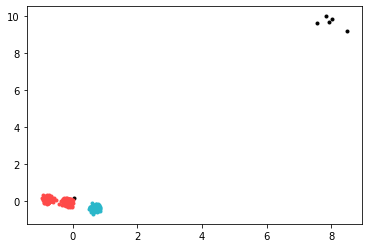

In [9]:
def main():

    # Reading from the data file
    df = pd.read_csv("Book2.csv")

    dataset = df.astype(float).values.tolist()

    # normalize dataset
    X = StandardScaler().fit_transform(dataset)

    _DBSCAN = DBSCAN()
    point_labels, clusters = _DBSCAN.fit(X, 0.125, 6)

    print(point_labels, clusters)
#     print(X)

    _DBSCAN.visualize(X, point_labels, clusters)
  


if __name__ == "__main__":
    main()

In [10]:
df = pd.read_csv("Book2.csv")

dataset = df.astype(float).values.tolist()

    # normalize dataset
X1 = StandardScaler().fit_transform(dataset)

from sklearn.cluster import KMeans

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km1 = km.fit_predict(X1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


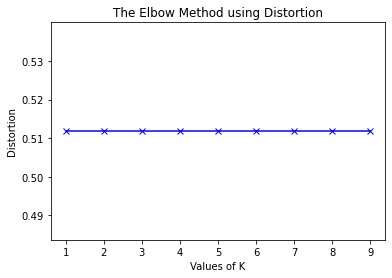

In [11]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel1 = KMeans(n_clusters=k).fit(X1)
    kmeanModel1.fit(X1)
    distortions.append(sum(np.min(cdist(X1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

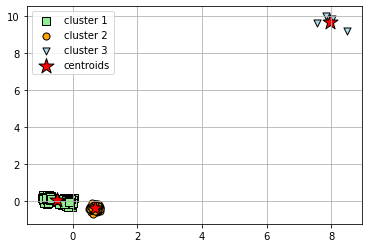

In [12]:
# plot the 3 clusters
plt.scatter(
    X1[y_km1 == 0, 0], X1[y_km1 == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    X1[y_km1 == 1, 0], X1[y_km1 == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    X1[y_km1 == 2, 0], X1[y_km1 == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='cluster 3'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()